<a href="https://colab.research.google.com/github/Oluwadara17/Data-Science/blob/main/Parkinson_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.utils import to_categorical


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Integration**

To achieve our aim and objective in by using machine learning algorithm to predict Parkinson disease, I had to utilised mutlimodal data which is the combination/Integration and analysis of data from mutiple sources.


Merging of Several data to form a single full **particpant record** from family,demographic,Age, participant status.

In [3]:
data1 = pd.read_csv('/content/Age_at_visit_21Mar2025.csv')
data2 = pd.read_csv('/content/Demographics_21Mar2025.csv')
data3 = pd.read_csv('/content/Family_History_21Mar2025.csv')
data4 = pd.read_csv('/content/Subject_Cohort_History_21Mar2025.csv')
data5 = pd.read_csv('/content/Participant_Status_21Mar2025.csv')

In [4]:
data1.columns, data2.columns, data3.columns, data4.columns, data5.columns

(Index(['PATNO', 'EVENT_ID', 'AGE_AT_VISIT'], dtype='object'),
 Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'AFICBERB',
        'ASHKJEW', 'BASQUE', 'BIRTHDT', 'SEX', 'CHLDBEAR', 'HOWLIVE', 'GAYLES',
        'HETERO', 'BISEXUAL', 'PANSEXUAL', 'ASEXUAL', 'OTHSEXUALITY', 'HANDED',
        'HISPLAT', 'RAASIAN', 'RABLACK', 'RAHAWOPI', 'RAINDALS', 'RANOS',
        'RAWHITE', 'RAUNKNOWN', 'ORIG_ENTRY', 'LAST_UPDATE'],
       dtype='object'),
 Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'ANYFAMPD',
        'BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD', 'FULSIB', 'FULBRO',
        'FULSIS', 'FULSIBPD', 'FULBROPD', 'FULSISPD', 'HAFSIB', 'PAHAFSIB',
        'MAHAFSIB', 'HAFSIBPD', 'MAHAFSIBPD', 'PAHAFSIBPD', 'MAGPAR',
        'MAGPARPD', 'MAGFATHPD', 'MAGMOTHPD', 'PAGPAR', 'PAGPARPD', 'PAGFATHPD',
        'PAGMOTHPD', 'MATAU', 'MATAUPD', 'PATAU', 'PATAUPD', 'KIDSNUM',
        'KIDSPD', 'DISFAMPD', 'MATCOUS', 'MATCOUSPD', 'PATCOUS', 'PATCOUSPD',
        'ORIG_ENTRY', 

In [5]:
LIST = [data1,data2,data3,data4,data4,data5]
for i, df in enumerate(LIST):  # Enumerate to get index
    if 'PAG_NAME' in df.columns:
        print(f"DataFrame {i}: {df['PAG_NAME'].unique()}")
    else:
        print(f"DataFrame {i}: 'PAG_NAME' column not found")

DataFrame 0: 'PAG_NAME' column not found
DataFrame 1: ['SCREEN']
DataFrame 2: ['FAMHXPD']
DataFrame 3: 'PAG_NAME' column not found
DataFrame 4: 'PAG_NAME' column not found
DataFrame 5: 'PAG_NAME' column not found


In [6]:
data1.head(2)

,PATNO,EVENT_ID,AGE_AT_VISIT
0,3000,BL,69.1
1,3000,R17,80.5


In [7]:
data1.shape, data2.shape, data3.shape, data4.shape, data5.shape

((34755, 3), (5001, 29), (5785, 43), (948, 3), (5039, 25))

In [8]:
merged_df = pd.merge(data5, data4, on= ['PATNO'], how='left')
merged_df.shape

(5039, 27)

In [9]:
merged_df.head(10)

,PATNO,COHORT_x,COHORT_DEFINITION,ENROLL_DATE,ENROLL_STATUS,STATUS_DATE,SCREENEDAM4,ENROLL_AGE,INEXPAGE,AV133STDY,...,ENRLPRKN,ENRLSRDC,ENRLNORM,ENRLHPSM,ENRLRBD,ENRLLRRK2,ENRLSNCA,ENRLGBA,APPRDX,COHORT_y
0,3000,2,Healthy Control,02/2011,Withdrew,10/2024,0.0,69.1,NaN,0.0,...,0.0,0.0,NaN,0,0,0,0,0,2.0,2.0
1,3001,1,Parkinson's Disease,03/2011,Enrolled,09/2021,0.0,65.1,NaN,0.0,...,0.0,1.0,NaN,0,0,0,0,0,1.0,1.0
2,3002,1,Parkinson's Disease,03/2011,Withdrew,10/2024,0.0,67.6,NaN,0.0,...,0.0,1.0,NaN,0,0,0,0,0,1.0,1.0
3,3003,1,Parkinson's Disease,04/2011,Enrolled,01/2022,0.0,56.7,NaN,0.0,...,0.0,1.0,NaN,0,0,0,0,0,1.0,1.0
4,3004,2,Healthy Control,04/2011,Enrolled,01/2022,0.0,59.4,NaN,0.0,...,0.0,0.0,NaN,0,0,0,0,0,2.0,2.0
5,3005,1,Parkinson's Disease,NaN,Excluded,03/2011,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN
6,3006,1,Parkinson's Disease,05/2011,Withdrew,10/2013,NaN,57.5,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN
7,3007,1,Parkinson's Disease,05/2011,Withdrew,06/2011,NaN,64.5,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN
8,3008,2,Healthy Control,06/2011,Withdrew,04/2024,0.0,81.9,NaN,0.0,...,0.0,0.0,NaN,0,0,0,0,0,2.0,2.0
9,3009,2,Healthy Control,06/2011,Enrolled,05/2021,0.0,83.7,NaN,0.0,...,0.0,0.0,NaN,0,0,0,0,0,2.0,2.0


In [10]:
merged_df.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_DATE',
       'ENROLL_STATUS', 'STATUS_DATE', 'SCREENEDAM4', 'ENROLL_AGE', 'INEXPAGE',
       'AV133STDY', 'TAUSTDY', 'GAITSTDY', 'PISTDY', 'SV2ASTDY', 'DATELIG',
       'PPMI_ONLINE_ENROLL', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLNORM',
       'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA', 'APPRDX',
       'COHORT_y'],
      dtype='object')

In [11]:
merged_df.drop(['COHORT_y','ENRLNORM','DATELIG','INEXPAGE','APPRDX'],axis=1,inplace= True)
merged_df.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_DATE',
       'ENROLL_STATUS', 'STATUS_DATE', 'SCREENEDAM4', 'ENROLL_AGE',
       'AV133STDY', 'TAUSTDY', 'GAITSTDY', 'PISTDY', 'SV2ASTDY',
       'PPMI_ONLINE_ENROLL', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM',
       'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA'],
      dtype='object')

In [12]:
list = [data.columns for data in [data1,data2,data3,merged_df]]
list

[Index(['PATNO', 'EVENT_ID', 'AGE_AT_VISIT'], dtype='object'),
 Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'AFICBERB',
        'ASHKJEW', 'BASQUE', 'BIRTHDT', 'SEX', 'CHLDBEAR', 'HOWLIVE', 'GAYLES',
        'HETERO', 'BISEXUAL', 'PANSEXUAL', 'ASEXUAL', 'OTHSEXUALITY', 'HANDED',
        'HISPLAT', 'RAASIAN', 'RABLACK', 'RAHAWOPI', 'RAINDALS', 'RANOS',
        'RAWHITE', 'RAUNKNOWN', 'ORIG_ENTRY', 'LAST_UPDATE'],
       dtype='object'),
 Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'ANYFAMPD',
        'BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD', 'FULSIB', 'FULBRO',
        'FULSIS', 'FULSIBPD', 'FULBROPD', 'FULSISPD', 'HAFSIB', 'PAHAFSIB',
        'MAHAFSIB', 'HAFSIBPD', 'MAHAFSIBPD', 'PAHAFSIBPD', 'MAGPAR',
        'MAGPARPD', 'MAGFATHPD', 'MAGMOTHPD', 'PAGPAR', 'PAGPARPD', 'PAGFATHPD',
        'PAGMOTHPD', 'MATAU', 'MATAUPD', 'PATAU', 'PATAUPD', 'KIDSNUM',
        'KIDSPD', 'DISFAMPD', 'MATCOUS', 'MATCOUSPD', 'PATCOUS', 'PATCOUSPD',
        'ORIG_ENTRY', 

In [13]:
new_merged_df = pd.merge(merged_df, data3, on=['PATNO'], how='left')  # Merge merged_df and data8 first
new1_merged_df = pd.merge(data2, data1, on=['PATNO','EVENT_ID'], how='inner')  # Then merge the result with data7
new_merged_df = pd.merge(new_merged_df, new1_merged_df, on=['PATNO'], how='left')  # Finally, merge with data6
new_merged_df.shape

(5977, 93)

In [14]:
threshold = 0.4

# Calculate the percentage of missing values in each column
missing_percentage = new_merged_df.isnull().sum() / len(new_merged_df)

# Get a list of columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

# Drop the columns
new_merged_df.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['BIOMOMPD', 'BIODADPD', 'FULSIBPD', 'FULBROPD', 'FULSISPD', 'HAFSIBPD', 'MAHAFSIBPD', 'PAHAFSIBPD', 'MAGPARPD', 'MAGFATHPD', 'MAGMOTHPD', 'PAGPARPD', 'PAGFATHPD', 'PAGMOTHPD', 'MATAUPD', 'PATAUPD', 'KIDSPD', 'DISFAMPD', 'MATCOUSPD', 'PATCOUSPD', 'REC_ID_y', 'EVENT_ID_y', 'PAG_NAME_y', 'INFODT_y', 'AFICBERB', 'ASHKJEW', 'BASQUE', 'BIRTHDT', 'SEX', 'CHLDBEAR', 'HOWLIVE', 'GAYLES', 'HETERO', 'BISEXUAL', 'PANSEXUAL', 'ASEXUAL', 'OTHSEXUALITY', 'HANDED', 'HISPLAT', 'RAASIAN', 'RABLACK', 'RAHAWOPI', 'RAINDALS', 'RANOS', 'RAWHITE', 'RAUNKNOWN', 'ORIG_ENTRY_y', 'LAST_UPDATE_y', 'AGE_AT_VISIT']


In [15]:
new_merged_df.shape

(5977, 44)

In [16]:
new_merged_df.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_DATE',
       'ENROLL_STATUS', 'STATUS_DATE', 'SCREENEDAM4', 'ENROLL_AGE',
       'AV133STDY', 'TAUSTDY', 'GAITSTDY', 'PISTDY', 'SV2ASTDY',
       'PPMI_ONLINE_ENROLL', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM',
       'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA', 'REC_ID_x', 'EVENT_ID_x',
       'PAG_NAME_x', 'INFODT_x', 'ANYFAMPD', 'BIOMOM', 'BIODAD', 'FULSIB',
       'FULBRO', 'FULSIS', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'MAGPAR',
       'PAGPAR', 'MATAU', 'PATAU', 'KIDSNUM', 'MATCOUS', 'PATCOUS',
       'ORIG_ENTRY_x', 'LAST_UPDATE_x'],
      dtype='object')

In [17]:
new_merged_df.drop(['ENROLL_DATE','STATUS_DATE','SCREENEDAM4','AV133STDY','TAUSTDY','GAITSTDY','PISTDY','SV2ASTDY','PPMI_ONLINE_ENROLL','REC_ID_x','EVENT_ID_x','PAG_NAME_x','INFODT_x'], axis=1, inplace=True)
new_merged_df.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_STATUS', 'ENROLL_AGE',
       'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
       'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD', 'BIOMOM', 'BIODAD', 'FULSIB',
       'FULBRO', 'FULSIS', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'MAGPAR',
       'PAGPAR', 'MATAU', 'PATAU', 'KIDSNUM', 'MATCOUS', 'PATCOUS',
       'ORIG_ENTRY_x', 'LAST_UPDATE_x'],
      dtype='object')

In [18]:
new_merged_df.shape

(5977, 31)

In [19]:
new_merged_df.to_csv('participant_history.csv')

# **Olfactory Dataset (Smell sense)**

In [20]:
smell = pd.read_csv('/content/University_of_Pennsylvania_Smell_Identification_Test_UPSIT_12Mar2025.csv')

In [21]:

smell.columns

Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'SCENT_01_CORRECT',
       'SCENT_01_RESPONSE', 'SCENT_02_CORRECT', 'SCENT_02_RESPONSE',
       'SCENT_03_CORRECT', 'SCENT_03_RESPONSE', 'SCENT_04_CORRECT',
       'SCENT_04_RESPONSE', 'SCENT_05_CORRECT', 'SCENT_05_RESPONSE',
       'SCENT_06_CORRECT', 'SCENT_06_RESPONSE', 'SCENT_07_CORRECT',
       'SCENT_07_RESPONSE', 'SCENT_08_CORRECT', 'SCENT_08_RESPONSE',
       'SCENT_09_CORRECT', 'SCENT_09_RESPONSE', 'SCENT_10_CORRECT',
       'SCENT_10_RESPONSE', 'SCENT_11_CORRECT', 'SCENT_11_RESPONSE',
       'SCENT_12_CORRECT', 'SCENT_12_RESPONSE', 'SCENT_13_CORRECT',
       'SCENT_13_RESPONSE', 'SCENT_14_CORRECT', 'SCENT_14_RESPONSE',
       'SCENT_15_CORRECT', 'SCENT_15_RESPONSE', 'SCENT_16_CORRECT',
       'SCENT_16_RESPONSE', 'SCENT_17_CORRECT', 'SCENT_17_RESPONSE',
       'SCENT_18_CORRECT', 'SCENT_18_RESPONSE', 'SCENT_19_CORRECT',
       'SCENT_19_RESPONSE', 'SCENT_20_CORRECT', 'SCENT_20_RESPONSE',
       'SCENT_21_CORRECT', 'S

In [22]:
smell.drop([ 'PAG_NAME', 'INFODT', 'SCENT_01_CORRECT',
       'SCENT_01_RESPONSE', 'SCENT_02_CORRECT', 'SCENT_02_RESPONSE',
       'SCENT_03_CORRECT', 'SCENT_03_RESPONSE', 'SCENT_04_CORRECT',
       'SCENT_04_RESPONSE', 'SCENT_05_CORRECT', 'SCENT_05_RESPONSE',
       'SCENT_06_CORRECT', 'SCENT_06_RESPONSE', 'SCENT_07_CORRECT',
       'SCENT_07_RESPONSE', 'SCENT_08_CORRECT', 'SCENT_08_RESPONSE',
       'SCENT_09_CORRECT', 'SCENT_09_RESPONSE', 'SCENT_10_CORRECT',
       'SCENT_10_RESPONSE', 'SCENT_11_CORRECT', 'SCENT_11_RESPONSE',
       'SCENT_12_CORRECT', 'SCENT_12_RESPONSE', 'SCENT_13_CORRECT',
       'SCENT_13_RESPONSE', 'SCENT_14_CORRECT', 'SCENT_14_RESPONSE',
       'SCENT_15_CORRECT', 'SCENT_15_RESPONSE', 'SCENT_16_CORRECT',
       'SCENT_16_RESPONSE', 'SCENT_17_CORRECT', 'SCENT_17_RESPONSE',
       'SCENT_18_CORRECT', 'SCENT_18_RESPONSE', 'SCENT_19_CORRECT',
       'SCENT_19_RESPONSE', 'SCENT_20_CORRECT', 'SCENT_20_RESPONSE',
       'SCENT_21_CORRECT', 'SCENT_21_RESPONSE', 'SCENT_22_CORRECT',
       'SCENT_22_RESPONSE', 'SCENT_23_CORRECT', 'SCENT_23_RESPONSE',
       'SCENT_24_CORRECT', 'SCENT_24_RESPONSE', 'SCENT_25_CORRECT',
       'SCENT_25_RESPONSE', 'SCENT_26_CORRECT', 'SCENT_26_RESPONSE',
       'SCENT_27_CORRECT', 'SCENT_27_RESPONSE', 'SCENT_28_CORRECT',
       'SCENT_28_RESPONSE', 'SCENT_29_CORRECT', 'SCENT_29_RESPONSE',
       'SCENT_30_CORRECT', 'SCENT_30_RESPONSE', 'SCENT_31_CORRECT',
       'SCENT_31_RESPONSE', 'SCENT_32_CORRECT', 'SCENT_32_RESPONSE',
       'SCENT_33_CORRECT', 'SCENT_33_RESPONSE', 'SCENT_34_CORRECT',
       'SCENT_34_RESPONSE', 'SCENT_35_CORRECT', 'SCENT_35_RESPONSE',
       'SCENT_36_CORRECT', 'SCENT_36_RESPONSE', 'SCENT_37_CORRECT',
       'SCENT_37_RESPONSE', 'SCENT_38_CORRECT', 'SCENT_38_RESPONSE',
       'SCENT_39_CORRECT', 'SCENT_39_RESPONSE', 'SCENT_40_CORRECT',
       'SCENT_40_RESPONSE','UPSIT_PRCTVER', 'IMPUTED_DATA', 'UPSIT_SOURCE',
       'UPSITLANGCNTR', 'ORIG_ENTRY', 'LAST_UPDATE','upsitorder'], axis=1, inplace=True)
smell.columns

Index(['REC_ID', 'PATNO', 'EVENT_ID', 'TOTAL_CORRECT', 'UPSITFORM',
       'UPSIT_PRCNTGE'],
      dtype='object')

# Integration of smell source to participant data.

In [23]:
new1_merged_df = pd.merge(new_merged_df,smell,on= ['PATNO'], how='inner')
new1_merged_df.shape

(4073, 36)

In [24]:
new1_merged_df.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_STATUS', 'ENROLL_AGE',
       'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
       'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD', 'BIOMOM', 'BIODAD', 'FULSIB',
       'FULBRO', 'FULSIS', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'MAGPAR',
       'PAGPAR', 'MATAU', 'PATAU', 'KIDSNUM', 'MATCOUS', 'PATCOUS',
       'ORIG_ENTRY_x', 'LAST_UPDATE_x', 'REC_ID', 'EVENT_ID', 'TOTAL_CORRECT',
       'UPSITFORM', 'UPSIT_PRCNTGE'],
      dtype='object')

In [25]:
new1_merged_df.to_csv('participant_history_smell.csv')

# **Integration of DaTscan data**

In [26]:
data6 = pd.read_csv('/content/DaTScan_Acquisition_Metadata_12Mar2025.csv')
data7 = pd.read_csv('/content/DaTScan_SBR_Analysis_12Mar2025.csv')
data8 = pd.read_csv('/content/DaTScan_Visual_Interpretation_Results_12Mar2025.csv')
data9 = pd.read_csv('/content/DaTscan_Imaging_12Mar2025.csv')

In [27]:
data6.head(5)

,PROTOCOL,PATNO,EVENT_ID,DATSCAN_LIGAND,DATSCAN_DATE,DATSCAN_START_TIME,DATSCAN_DATE_INJECTED,DATSCAN_TIME_INJECTED,DATSCAN_TOTAL_DOSE_CALC,DATSCAN_TOTAL_DOSE_UNIT,08_actual_dose_injected_E1_C2,08a_actual_dose_unit_E1_C2,DATSCAN_QUALITY_RATING,DATSCAN_IMAGE_ACCEPTABLE,SCANNER_CHANGE_AFTER_BASELINE,SCANNER_CHANGE_AFTER_PREVIOUS
0,001,3000,SC,NaN,01/2011,16:38,01/2011,12:40,NaN,NaN,5.08,mCi,2.0,Yes,NaN,NaN
1,001,3001,U01,NaN,06/2011,15:29,06/2011,11:32,NaN,NaN,4.43,mCi,2.0,Yes,NaN,NaN
2,001,3001,U02,NaN,04/2014,15:08,04/2014,11:15,NaN,NaN,4.69,mCi,2.0,Yes,NaN,NaN
3,001,3001,V04,NaN,04/2012,14:54,04/2012,11:02,NaN,NaN,4.74,mCi,1.0,Yes,NaN,NaN
4,001,3001,V06,NaN,05/2013,15:20,05/2013,11:23,NaN,NaN,4.87,mCi,1.0,Yes,NaN,NaN


In [28]:
data6.drop(['DATSCAN_DATE_INJECTED','DATSCAN_TIME_INJECTED','DATSCAN_TOTAL_DOSE_CALC','DATSCAN_TOTAL_DOSE_UNIT','SCANNER_CHANGE_AFTER_PREVIOUS'],axis=1,inplace= True)
data6.columns


Index(['PROTOCOL', 'PATNO', 'EVENT_ID', 'DATSCAN_LIGAND', 'DATSCAN_DATE',
       'DATSCAN_START_TIME', '08_actual_dose_injected_E1_C2',
       '08a_actual_dose_unit_E1_C2', 'DATSCAN_QUALITY_RATING',
       'DATSCAN_IMAGE_ACCEPTABLE', 'SCANNER_CHANGE_AFTER_BASELINE'],
      dtype='object')

In [29]:
data6.shape

(4229, 11)

In [30]:
data7.head(5)

,PROTOCOL,PATNO,EVENT_ID,DATSCAN_LIGAND,DATSCAN_DATE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,DATSCAN_PUTAMEN_R_ANT,DATSCAN_PUTAMEN_L_ANT,DATSCAN_ANALYZED,DATSCAN_NOT_ANALYZED_REASON,DATSCAN_OTHER_SPECIFY
0,001,3000,SC,NaN,01/2011,2.99,3.43,2.94,2.63,3.28,3.40,Yes,NaN,NaN
1,001,3001,U01,NaN,06/2011,2.00,1.92,0.80,0.65,1.51,1.06,Yes,NaN,NaN
2,001,3001,U02,NaN,04/2014,1.53,0.65,0.37,0.50,0.85,0.60,Yes,NaN,NaN
3,001,3001,V04,NaN,04/2012,1.56,1.12,0.62,0.48,0.91,0.74,Yes,NaN,NaN
4,001,3001,V06,NaN,05/2013,1.68,1.26,0.38,0.42,0.88,0.62,Yes,NaN,NaN


In [31]:
data7.shape

(4181, 14)

In [32]:
data7.drop(['DATSCAN_OTHER_SPECIFY','DATSCAN_NOT_ANALYZED_REASON','DATSCAN_DATE'],axis=1,inplace= True)
data7.columns

Index(['PROTOCOL', 'PATNO', 'EVENT_ID', 'DATSCAN_LIGAND', 'DATSCAN_CAUDATE_R',
       'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L',
       'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_ANALYZED'],
      dtype='object')

In [33]:
data8.head(5)

,PROTOCOL,PATNO,DATSCAN_LIGAND,DATSCAN_VISINTRP,DATSCAN_DATE
0,001,3000,NaN,negative,01/2011
1,001,3001,NaN,positive,06/2011
2,001,3002,NaN,positive,06/2011
3,001,3003,NaN,positive,08/2011
4,001,3004,NaN,negative,08/2011


In [34]:
data8.drop(['DATSCAN_DATE'],axis=1,inplace= True)
data8.columns

Index(['PROTOCOL', 'PATNO', 'DATSCAN_LIGAND', 'DATSCAN_VISINTRP'], dtype='object')

In [35]:
data8.shape

(2148, 4)

In [36]:
data9.head(5)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,REC_ID,PATNO,EVENT_ID,SUB_EVENT_ID,PAG_NAME,INFODT,OFF_SCHEDULE,DATSCAN,DATSCANTRC,PREVDATDT,SCNLOC,SCNINJCT,VSINTRPT,VSRPTELG,DIFFLOC,ORIG_ENTRY,LAST_UPDATE
0,270351501,3000,SC,NaN,DATSCAN,01/2011,NaN,1,1.0,NaN,1.0,NaN,2,NaN,NaN,01/2011,2020-06-25 16:02:20.0
1,278732601,3001,SC,NaN,DATSCAN,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,03/2011,2020-06-25 16:04:31.0
2,316925201,3001,U01,NaN,DATSCAN,06/2011,NaN,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,10/2011,2020-06-25 16:04:32.0
3,457265901,3001,U02,NaN,DATSCAN,04/2014,NaN,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,09/2014,2020-06-25 16:04:32.0
4,341974701,3001,V04,NaN,DATSCAN,04/2012,NaN,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,04/2012,2020-06-25 16:04:33.0


In [37]:
data9.drop(['SUB_EVENT_ID','INFODT','DIFFLOC','ORIG_ENTRY','LAST_UPDATE'],axis=1,inplace= True)
data9.columns

Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'OFF_SCHEDULE', 'DATSCAN',
       'DATSCANTRC', 'PREVDATDT', 'SCNLOC', 'SCNINJCT', 'VSINTRPT',
       'VSRPTELG'],
      dtype='object')

In [38]:
data9.shape

(11345, 12)

In [39]:
LIST = [data6,data7,data8,data9]
for i, df in enumerate(LIST):  # Enumerate to get index
    if 'PAG_NAME' in df.columns:
        print(f"DataFrame {i}: {df['PAG_NAME'].unique()}")
    else:
        print(f"DataFrame {i}: 'PAG_NAME' column not found")

DataFrame 0: 'PAG_NAME' column not found
DataFrame 1: 'PAG_NAME' column not found
DataFrame 2: 'PAG_NAME' column not found
DataFrame 3: ['DATSCAN']


In [40]:
list = [data.columns for data in [data6,data7,data8,data9]]
list

[Index(['PROTOCOL', 'PATNO', 'EVENT_ID', 'DATSCAN_LIGAND', 'DATSCAN_DATE',
        'DATSCAN_START_TIME', '08_actual_dose_injected_E1_C2',
        '08a_actual_dose_unit_E1_C2', 'DATSCAN_QUALITY_RATING',
        'DATSCAN_IMAGE_ACCEPTABLE', 'SCANNER_CHANGE_AFTER_BASELINE'],
       dtype='object'),
 Index(['PROTOCOL', 'PATNO', 'EVENT_ID', 'DATSCAN_LIGAND', 'DATSCAN_CAUDATE_R',
        'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L',
        'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_ANALYZED'],
       dtype='object'),
 Index(['PROTOCOL', 'PATNO', 'DATSCAN_LIGAND', 'DATSCAN_VISINTRP'], dtype='object'),
 Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'OFF_SCHEDULE', 'DATSCAN',
        'DATSCANTRC', 'PREVDATDT', 'SCNLOC', 'SCNINJCT', 'VSINTRPT',
        'VSRPTELG'],
       dtype='object')]

In [41]:
merged_df = pd.merge(data9, data7, on= ['PATNO','EVENT_ID'], how='inner')
merged_df = pd.merge(merged_df, data6, on=['PATNO','EVENT_ID','DATSCAN_LIGAND'], how='inner')
merged_df = pd.merge(merged_df, data8, on=['PATNO','DATSCAN_LIGAND'], how='inner')
print(merged_df.head(10))

      REC_ID  PATNO EVENT_ID PAG_NAME  OFF_SCHEDULE  DATSCAN  DATSCANTRC  \
0  270351501   3000       SC  DATSCAN           NaN        1         1.0   
1  316925201   3001      U01  DATSCAN           NaN        1         1.0   
2  457265901   3001      U02  DATSCAN           NaN        1         1.0   
3  341974701   3001      V04  DATSCAN           NaN        1         1.0   
4  398210701   3001      V06  DATSCAN           NaN        1         1.0   
5  516500401   3001      V10  DATSCAN           NaN        1         1.0   
6  316929601   3002      U01  DATSCAN           NaN        1         1.0   
7  457263901   3002      U02  DATSCAN           NaN        1         1.0   
8  345072001   3002      V04  DATSCAN           NaN        1         1.0   
9  396335201   3002      V06  DATSCAN           NaN        1         1.0   

  PREVDATDT  SCNLOC  SCNINJCT  ... PROTOCOL_y  DATSCAN_DATE  \
0       NaN     1.0       NaN  ...        001       01/2011   
1       NaN     1.0       NaN  ...   

In [42]:
merged_df.shape

(4160, 31)

In [43]:
threshold = 0.4

# Calculate the percentage of missing values in each column
missing_percentage = merged_df.isnull().sum() / len(merged_df)

# Get a list of columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

# Drop the columns
merged_df.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['OFF_SCHEDULE', 'PREVDATDT', 'SCNINJCT', 'VSINTRPT', 'VSRPTELG', 'DATSCAN_LIGAND', '08_actual_dose_injected_E1_C2', '08a_actual_dose_unit_E1_C2', 'SCANNER_CHANGE_AFTER_BASELINE']


In [44]:
merged_df.shape

(4160, 22)

In [45]:
merged_df.columns


Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'DATSCAN', 'DATSCANTRC',
       'SCNLOC', 'PROTOCOL_x', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
       'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT',
       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_ANALYZED', 'PROTOCOL_y',
       'DATSCAN_DATE', 'DATSCAN_START_TIME', 'DATSCAN_QUALITY_RATING',
       'DATSCAN_IMAGE_ACCEPTABLE', 'PROTOCOL', 'DATSCAN_VISINTRP'],
      dtype='object')

In [46]:
merged_df.drop(['PAG_NAME','PROTOCOL_y','PROTOCOL_x','PROTOCOL'],axis=1,inplace= True)
merged_df.columns

Index(['REC_ID', 'PATNO', 'EVENT_ID', 'DATSCAN', 'DATSCANTRC', 'SCNLOC',
       'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
       'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT',
       'DATSCAN_ANALYZED', 'DATSCAN_DATE', 'DATSCAN_START_TIME',
       'DATSCAN_QUALITY_RATING', 'DATSCAN_IMAGE_ACCEPTABLE',
       'DATSCAN_VISINTRP'],
      dtype='object')

In [47]:
merged_df.to_csv('DaTscan.csv')

In [48]:
list = [data.columns for data in [new1_merged_df,merged_df]]
list

[Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_STATUS', 'ENROLL_AGE',
        'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
        'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD', 'BIOMOM', 'BIODAD', 'FULSIB',
        'FULBRO', 'FULSIS', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'MAGPAR',
        'PAGPAR', 'MATAU', 'PATAU', 'KIDSNUM', 'MATCOUS', 'PATCOUS',
        'ORIG_ENTRY_x', 'LAST_UPDATE_x', 'REC_ID', 'EVENT_ID', 'TOTAL_CORRECT',
        'UPSITFORM', 'UPSIT_PRCNTGE'],
       dtype='object'),
 Index(['REC_ID', 'PATNO', 'EVENT_ID', 'DATSCAN', 'DATSCANTRC', 'SCNLOC',
        'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
        'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT',
        'DATSCAN_ANALYZED', 'DATSCAN_DATE', 'DATSCAN_START_TIME',
        'DATSCAN_QUALITY_RATING', 'DATSCAN_IMAGE_ACCEPTABLE',
        'DATSCAN_VISINTRP'],
       dtype='object')]

In [49]:
new1_merged_df = pd.merge(new1_merged_df,merged_df,on= ['PATNO','EVENT_ID'], how='left')
new1_merged_df.shape


(4073, 52)

In [50]:
new1_merged_df.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_STATUS', 'ENROLL_AGE',
       'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
       'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD', 'BIOMOM', 'BIODAD', 'FULSIB',
       'FULBRO', 'FULSIS', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'MAGPAR',
       'PAGPAR', 'MATAU', 'PATAU', 'KIDSNUM', 'MATCOUS', 'PATCOUS',
       'ORIG_ENTRY_x', 'LAST_UPDATE_x', 'REC_ID_x', 'EVENT_ID',
       'TOTAL_CORRECT', 'UPSITFORM', 'UPSIT_PRCNTGE', 'REC_ID_y', 'DATSCAN',
       'DATSCANTRC', 'SCNLOC', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
       'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT',
       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_ANALYZED', 'DATSCAN_DATE',
       'DATSCAN_START_TIME', 'DATSCAN_QUALITY_RATING',
       'DATSCAN_IMAGE_ACCEPTABLE', 'DATSCAN_VISINTRP'],
      dtype='object')

In [51]:
new1_merged_df.to_csv('participant_history_olfactory_DaTscan.csv')

# **Integration of Medical data**

feature of Parkinson




In [52]:
feat1 = pd.read_csv('/content/Features_of_Parkinsonism_23Mar2025.csv')
feat1.head(5)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,FEATBRADY,FEATPOSINS,FEATRIGID,FEATTREMOR,PSGLVL,ORIG_ENTRY,LAST_UPDATE
0,720683801,3000,V10,DIAGFEAT,03/2015,0.0,0.0,0.0,0.0,NaN,12/2018,2020-06-25 16:02:23.0
1,565128201,3000,V12,DIAGFEAT,04/2016,0.0,0.0,0.0,0.0,NaN,04/2016,2020-06-25 16:02:23.0
2,736287401,3000,V15,DIAGFEAT,03/2019,0.0,0.0,0.0,0.0,NaN,04/2019,2020-06-25 16:02:24.0
3,IA32673,3000,V17,FEATPD,05/2021,0.0,0.0,0.0,0.0,5.0,06/2021,2021-06-01 00:00:00.0
4,IA32676,3001,R18,FEATPD,09/2022,1.0,2.0,2.0,1.0,1.0,09/2022,2022-09-30 00:00:00.0


In [53]:
feat1.shape

(21618, 12)

In [54]:
feat = feat1[feat1['PAG_NAME']=='FEATPD'].copy()
feat.shape

(13898, 12)

In [55]:
feat.columns

Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'FEATBRADY',
       'FEATPOSINS', 'FEATRIGID', 'FEATTREMOR', 'PSGLVL', 'ORIG_ENTRY',
       'LAST_UPDATE'],
      dtype='object')

In [56]:
feat.drop(['REC_ID','INFODT','ORIG_ENTRY','LAST_UPDATE'], axis =1, inplace= True)
feat.columns

Index(['PATNO', 'EVENT_ID', 'PAG_NAME', 'FEATBRADY', 'FEATPOSINS', 'FEATRIGID',
       'FEATTREMOR', 'PSGLVL'],
      dtype='object')

In [57]:
new2_merged_df = pd.merge(new1_merged_df,feat,on= ['PATNO','EVENT_ID'], how='left')
new2_merged_df.shape

(4073, 58)

In [58]:
new2_merged_df.to_csv('PODM_data.csv')

# **Integration of Clinical Data (MDS_UPDRS)**

In [59]:
MD1 = pd.read_csv('/content/MDS_UPDRS_Part_II__Patient_Questionnaire_23Mar2025.csv')
MD1.head(5)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,...,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,NP2PTOT,ORIG_ENTRY,LAST_UPDATE
0,272451701,3000,BL,NUPDRS2P,02/2011,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0
1,338702901,3000,V04,NUPDRS2P,03/2012,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03/2012,2020-06-25 16:02:22.0
2,385009601,3000,V06,NUPDRS2P,02/2013,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0
3,437131001,3000,V08,NUPDRS2P,03/2014,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,05/2014,2020-06-25 16:02:22.0
4,512467901,3000,V10,NUPDRS2P,03/2015,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03/2015,2020-06-25 16:02:23.0


In [60]:
MD1.PAG_NAME.unique()

array(['NUPDRS2P', 'NUPDRS1P2P'], dtype=object)

In [61]:
md1 = MD1[MD1['PAG_NAME']=='NUPDRS1P2P'].copy()
md1.shape

(14841, 22)

In [62]:
md1.columns

Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'NUPSOURC',
       'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN',
       'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK',
       'NP2FREZ', 'NP2PTOT', 'ORIG_ENTRY', 'LAST_UPDATE'],
      dtype='object')

In [63]:
md1.drop(['ORIG_ENTRY', 'LAST_UPDATE','INFODT','PAG_NAME','REC_ID','NUPSOURC'],axis=1, inplace= True)
md1.columns

Index(['PATNO', 'EVENT_ID', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT',
       'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR',
       'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP2PTOT'],
      dtype='object')

In [64]:
md1.shape

(14841, 16)

In [65]:
final = pd.merge(new2_merged_df,md1,on= ['PATNO','EVENT_ID'], how='left')
final.shape

(4073, 72)

In [66]:
threshold = 0.4

# Calculate the percentage of missing values in each column
missing_percentage = final.isnull().sum() / len(final)

# Get a list of columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

# Drop the columns
final.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['REC_ID_y', 'DATSCAN', 'DATSCANTRC', 'SCNLOC', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R', 'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_ANALYZED', 'DATSCAN_DATE', 'DATSCAN_START_TIME', 'DATSCAN_QUALITY_RATING', 'DATSCAN_IMAGE_ACCEPTABLE', 'DATSCAN_VISINTRP', 'PAG_NAME', 'FEATBRADY', 'FEATPOSINS', 'FEATRIGID', 'FEATTREMOR', 'PSGLVL', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP2PTOT']


In [67]:
final.shape

(4073, 36)

In [68]:
final.duplicated().sum()

np.int64(14)

In [69]:
final.drop_duplicates(inplace=True)
final.shape

(4059, 36)

In [70]:
final.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_STATUS', 'ENROLL_AGE',
       'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
       'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD', 'BIOMOM', 'BIODAD', 'FULSIB',
       'FULBRO', 'FULSIS', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'MAGPAR',
       'PAGPAR', 'MATAU', 'PATAU', 'KIDSNUM', 'MATCOUS', 'PATCOUS',
       'ORIG_ENTRY_x', 'LAST_UPDATE_x', 'REC_ID_x', 'EVENT_ID',
       'TOTAL_CORRECT', 'UPSITFORM', 'UPSIT_PRCNTGE'],
      dtype='object')

In [71]:
final.drop(['ORIG_ENTRY_x', 'LAST_UPDATE_x', 'REC_ID_x', 'EVENT_ID'],axis=1, inplace= True)
final.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_STATUS', 'ENROLL_AGE',
       'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
       'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD', 'BIOMOM', 'BIODAD', 'FULSIB',
       'FULBRO', 'FULSIS', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'MAGPAR',
       'PAGPAR', 'MATAU', 'PATAU', 'KIDSNUM', 'MATCOUS', 'PATCOUS',
       'TOTAL_CORRECT', 'UPSITFORM', 'UPSIT_PRCNTGE'],
      dtype='object')

In [72]:
final.to_csv('final_data.csv')

# **Data Insight**
Statistical Analysis


In [73]:
final = pd.read_csv('/content/final_data.csv')

In [74]:
for column in final.columns:
  unique_values = final[column].unique()
  print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Unnamed: 0': [   0    1    2 ... 4070 4071 4072]
Unique values in column 'PATNO': [ 40568  52927  54446 ... 418765 425673 430172]
Unique values in column 'COHORT_x': [4 1 2]
Unique values in column 'COHORT_DEFINITION': ['Prodromal' "Parkinson's Disease" 'Healthy Control']
Unique values in column 'ENROLL_STATUS': ['Enrolled' 'Withdrew' 'Screen failed' 'Baseline Withdraw' 'Pending'
 'Withdraw Deceased' 'Screened' 'Screen Scheduled' 'Lost to follow-up'
 'Baseline']
Unique values in column 'ENROLL_AGE': [49.8 67.2 51.8 59.8 69.9 66.8 72.4 73.2 68.5 56.8 72.7 67.4 52.8 55.7
 66.1 58.8 66.5 67.5 64.2 75.3 53.6 72.5 76.9 63.5 69.3 63.9 65.  71.4
 65.9 74.9 78.2 62.3 75.9 73.1 50.8 75.2 66.2 63.8 61.7 61.5 62.4 65.7
 73.9 46.1 64.4 63.2 75.1 57.6 49.7 67.  69.6 72.1 73.3 55.2 70.9 61.9
 44.  78.1 62.8 73.8 66.4 51.5 64.5  nan 68.8 65.2 61.8 74.7 63.1 62.7
 50.9 40.4 70.8 58.3 44.3 71.7 70.  66.9 68.  61.3 59.5 60.5 74.5 61.
 63.7 79.1 39.2 71.  64.7 71.1 78.3 70.2 65.1

In [75]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4059 non-null   int64  
 1   PATNO              4059 non-null   int64  
 2   COHORT_x           4059 non-null   int64  
 3   COHORT_DEFINITION  4059 non-null   object 
 4   ENROLL_STATUS      4059 non-null   object 
 5   ENROLL_AGE         3721 non-null   float64
 6   ENRLPINK1          4059 non-null   float64
 7   ENRLPRKN           4059 non-null   float64
 8   ENRLSRDC           4059 non-null   float64
 9   ENRLHPSM           4059 non-null   int64  
 10  ENRLRBD            4059 non-null   int64  
 11  ENRLLRRK2          4059 non-null   int64  
 12  ENRLSNCA           4059 non-null   int64  
 13  ENRLGBA            4059 non-null   int64  
 14  ANYFAMPD           4007 non-null   float64
 15  BIOMOM             4008 non-null   float64
 16  BIODAD             4008 

In [76]:
final.describe()

,Unnamed: 0,PATNO,COHORT_x,ENROLL_AGE,ENRLPINK1,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLLRRK2,...,MAGPAR,PAGPAR,MATAU,PATAU,KIDSNUM,MATCOUS,PATCOUS,TOTAL_CORRECT,UPSITFORM,UPSIT_PRCNTGE
count,4059.000000,4059.000000,4059.000000,3721.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,...,4008.0,4008.0,3988.000000,3984.000000,4001.000000,3911.000000,3917.00000,4038.000000,4059.000000,4038.000000
mean,2034.727273,221909.977827,3.376940,67.004945,0.000246,0.002956,0.172210,0.618872,0.188470,0.007637,...,2.0,2.0,3.243230,3.182480,1.815046,7.868576,7.44626,22.817732,1.863513,15.909485
std,1176.677574,79124.333743,1.186344,7.160320,0.015696,0.054299,0.377609,0.485724,0.391135,0.087068,...,0.0,0.0,2.815008,2.851252,1.279564,9.503216,9.58567,8.171009,0.343347,20.295865
min,0.000000,40568.000000,1.000000,29.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,1.000000,1.000000
25%,1014.500000,159744.500000,4.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.0,2.0,1.000000,1.000000,1.000000,2.000000,2.00000,16.000000,2.000000,4.000000
50%,2033.000000,216360.000000,4.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.0,2.0,2.000000,2.000000,2.000000,5.000000,4.00000,23.000000,2.000000,9.000000
75%,3051.500000,292889.500000,4.000000,71.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.0,2.0,5.000000,5.000000,3.000000,10.000000,10.00000,29.000000,2.000000,16.500000
max,4072.000000,430172.000000,4.000000,89.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.0,2.0,20.000000,20.000000,13.000000,100.000000,150.00000,40.000000,2.000000,99.500000


In [77]:
final.nunique()

,0
Unnamed: 0,4059
PATNO,2778
COHORT_x,3
COHORT_DEFINITION,3
ENROLL_STATUS,10
ENROLL_AGE,388
ENRLPINK1,2
ENRLPRKN,2
ENRLSRDC,2
ENRLHPSM,2


In [78]:
final.isnull().sum()

,0
Unnamed: 0,0
PATNO,0
COHORT_x,0
COHORT_DEFINITION,0
ENROLL_STATUS,0
ENROLL_AGE,338
ENRLPINK1,0
ENRLPRKN,0
ENRLSRDC,0
ENRLHPSM,0


In [79]:
final1 = final[['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_STATUS',
                    'ENROLL_AGE', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM',
                    'ENRLRBD', 'ENRLLRRK2','ENRLSNCA', 'ENRLGBA', 'ANYFAMPD',
                    'TOTAL_CORRECT', 'UPSIT_PRCNTGE']].copy()
final1.shape

(4059, 16)

In [80]:
desired_statuses = ['Enrolled', 'Withdrew', 'Pending', 'Baseline Withdraw', 'Screened']
filtered_final = final1[final1['ENROLL_STATUS'].isin(desired_statuses)]
print(filtered_final.shape)

(3886, 16)


In [81]:
filtered_final.isnull().sum()

,0
PATNO,0
COHORT_x,0
COHORT_DEFINITION,0
ENROLL_STATUS,0
ENROLL_AGE,174
ENRLPINK1,0
ENRLPRKN,0
ENRLSRDC,0
ENRLHPSM,0
ENRLRBD,0


In [82]:
mean = filtered_final['ENROLL_AGE'].mean()
filtered_final['ENROLL_AGE'] = filtered_final['ENROLL_AGE'].fillna(mean)

filtered_final[['ANYFAMPD','TOTAL_CORRECT','UPSIT_PRCNTGE']] = filtered_final[['ANYFAMPD','TOTAL_CORRECT','UPSIT_PRCNTGE']].fillna(0)

<ipython-input-82-9e142eaad962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_final['ENROLL_AGE'] = filtered_final['ENROLL_AGE'].fillna(mean)
<ipython-input-82-9e142eaad962>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_final[['ANYFAMPD','TOTAL_CORRECT','UPSIT_PRCNTGE']] = filtered_final[['ANYFAMPD','TOTAL_CORRECT','UPSIT_PRCNTGE']].fillna(0)


In [83]:
filtered_final.isnull().sum()

,0
PATNO,0
COHORT_x,0
COHORT_DEFINITION,0
ENROLL_STATUS,0
ENROLL_AGE,0
ENRLPINK1,0
ENRLPRKN,0
ENRLSRDC,0
ENRLHPSM,0
ENRLRBD,0


In [84]:
filtered_final.columns

Index(['PATNO', 'COHORT_x', 'COHORT_DEFINITION', 'ENROLL_STATUS', 'ENROLL_AGE',
       'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
       'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD', 'TOTAL_CORRECT', 'UPSIT_PRCNTGE'],
      dtype='object')

In [85]:
for column in filtered_final.columns:
  unique_values = filtered_final[column].unique()
  print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'PATNO': [ 40568  52927  54446 ... 418293 418765 425673]
Unique values in column 'COHORT_x': [4 1 2]
Unique values in column 'COHORT_DEFINITION': ['Prodromal' "Parkinson's Disease" 'Healthy Control']
Unique values in column 'ENROLL_STATUS': ['Enrolled' 'Withdrew' 'Baseline Withdraw' 'Pending' 'Screened']
Unique values in column 'ENROLL_AGE': [49.8 67.2 51.8 59.8 69.9 66.8 72.4 73.2 68.5 56.8 72.7 67.4 52.8 55.7
 66.1 58.8 66.5 67.5 64.2 75.3 53.6 72.5 76.9 63.5 69.3 63.9 65.  71.4
 65.9 74.9 78.2 62.3 75.9 73.1 50.8 75.2 66.2 63.8 61.7 61.5 62.4 65.7
 73.9 46.1 64.4 63.2 75.1 57.6 49.7 67.  69.6 72.1 73.3 55.2 70.9 61.9
 44.  78.1 62.8 73.8 66.4 51.5 64.5 68.8 65.2 61.8 74.7 63.1 62.7 50.9
 40.4 70.8 58.3 44.3 71.7 70.  66.9 68.  61.3 59.5 60.5 74.5 61.  63.7
 79.1 39.2 71.  64.7 71.1 78.3 70.2 65.1 66.  60.8 75.  62.9 71.9 65.5
 71.6 68.2 70.4 76.6 56.6 65.3 70.1 71.2 67.9 56.3 52.2 48.3 75.5 70.5
 69.4 50.3 63.3 74.6 54.7 58.9 57.7 76.2 76.3 57.4 56.7 81.1 36.

Unique values in column 'COHORT_x': [4 1 2]

1.'COHORT_x': [4 1 2]
4: Prodomal
2: Healthy Control
1: Parkinson's Disease

2.'ENRLPINK1': [0. 1.] [0: NO 1:Yes]
3.'ENRLPRKN': [0 1.] [0: NO 1:Yes]
4.'ENRLSRDC': [0. 1.][0: NO 1:Yes]
5.'ENRLHPSM': [0 1] [0: NO 1:Yes]
6.'ENRLRBD': [0 1] [0: NO 1:Yes]
7.'ENRLLRRK2': [1 0] [0: NO 1:Yes]
8.'ENRLSNCA': [0 1] [0: NO 1:Yes]
8.'ENRLGBA': [0 1] [0: NO 1:Yes]
9.'ANYFAMPD': [ 1. nan  0.] [0: NO 1:Yes]
10.'BIOMOM': [ 1. nan] [0: NO 1:Yes]
11.'BIODAD': [0: NO 1:Yes]



# Number and labels (categories) of categorical variables

In [86]:
cat_vars = filtered_final.select_dtypes(include='object').columns
num_cat_vars = len(cat_vars)
print("Number of categorical variables:", num_cat_vars)
print("Categorical variable labels: ")

for var in cat_vars:
  print(f'unique values of {var}:\n {filtered_final[var].value_counts()}')
  print("")

Number of categorical variables: 2
Categorical variable labels: 
unique values of COHORT_DEFINITION:
 COHORT_DEFINITION
Prodromal              3026
Parkinson's Disease     719
Healthy Control         141
Name: count, dtype: int64

unique values of ENROLL_STATUS:
 ENROLL_STATUS
Enrolled             3604
Screened              104
Withdrew               73
Pending                70
Baseline Withdraw      35
Name: count, dtype: int64



#Number of numeric features

In [87]:
# Number of numeric features
num_vars = filtered_final.select_dtypes(include=['int64', 'float64']).columns
num_num_vars = len(num_vars)
print("Number of numeric variables:", num_num_vars)

Number of numeric variables: 14


# Range, Mean, Q1, Q2, Q3, Standard Deviation for all the numeric variables in the dataset (to be calculated and reported separately for each numeric variable)

In [88]:
# iterate the numerical features
for col in num_vars:
  range =  filtered_final[col].max() - filtered_final[col].min()
  # Mean
  Mean = filtered_final[col].mean()

  # Quartiles
  Q1 = filtered_final[col].quantile(0.25)
  Q2 = filtered_final[col].quantile(0.50)
  Q3 = filtered_final[col].quantile(0.75)

  # Standard Deviation
  Standard_Deviation = filtered_final[col].std()
  print(f'Numberic Statistics For {col} Feature')
  print('Range:', range)
  print('Q1:', Q1 )
  print('Q2:', Q2  )
  print('Q3:', Q3 )
  print('Standard_Deviation:', Standard_Deviation)
  print(" ")

Numberic Statistics For PATNO Feature
Range: 385105
Q1: 157658.0
Q2: 213772.5
Q3: 284491.0
Standard_Deviation: 77816.85213440322
 
Numberic Statistics For COHORT_x Feature
Range: 3
Q1: 4.0
Q2: 4.0
Q3: 4.0
Standard_Deviation: 1.190285832867035
 
Numberic Statistics For ENROLL_AGE Feature
Range: 60.5
Q1: 63.2
Q2: 67.0
Q3: 71.2
Standard_Deviation: 7.002823479107305
 
Numberic Statistics For ENRLPINK1 Feature
Range: 1.0
Q1: 0.0
Q2: 0.0
Q3: 0.0
Standard_Deviation: 0.01604163394288085
 
Numberic Statistics For ENRLPRKN Feature
Range: 1.0
Q1: 0.0
Q2: 0.0
Q3: 0.0
Standard_Deviation: 0.055491123969782355
 
Numberic Statistics For ENRLSRDC Feature
Range: 1.0
Q1: 0.0
Q2: 0.0
Q3: 0.0
Standard_Deviation: 0.3791219718221907
 
Numberic Statistics For ENRLHPSM Feature
Range: 1
Q1: 0.0
Q2: 1.0
Q3: 1.0
Standard_Deviation: 0.4869536529583824
 
Numberic Statistics For ENRLRBD Feature
Range: 1
Q1: 0.0
Q2: 0.0
Q3: 0.0
Standard_Deviation: 0.39450386145614486
 
Numberic Statistics For ENRLLRRK2 Feature
Range:

# Data Visualisation

# Numeric Feature

To show the distrubtion of each feature of the Numberic type.

In [89]:
num_vars

Index(['PATNO', 'COHORT_x', 'ENROLL_AGE', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC',
       'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD',
       'TOTAL_CORRECT', 'UPSIT_PRCNTGE'],
      dtype='object')

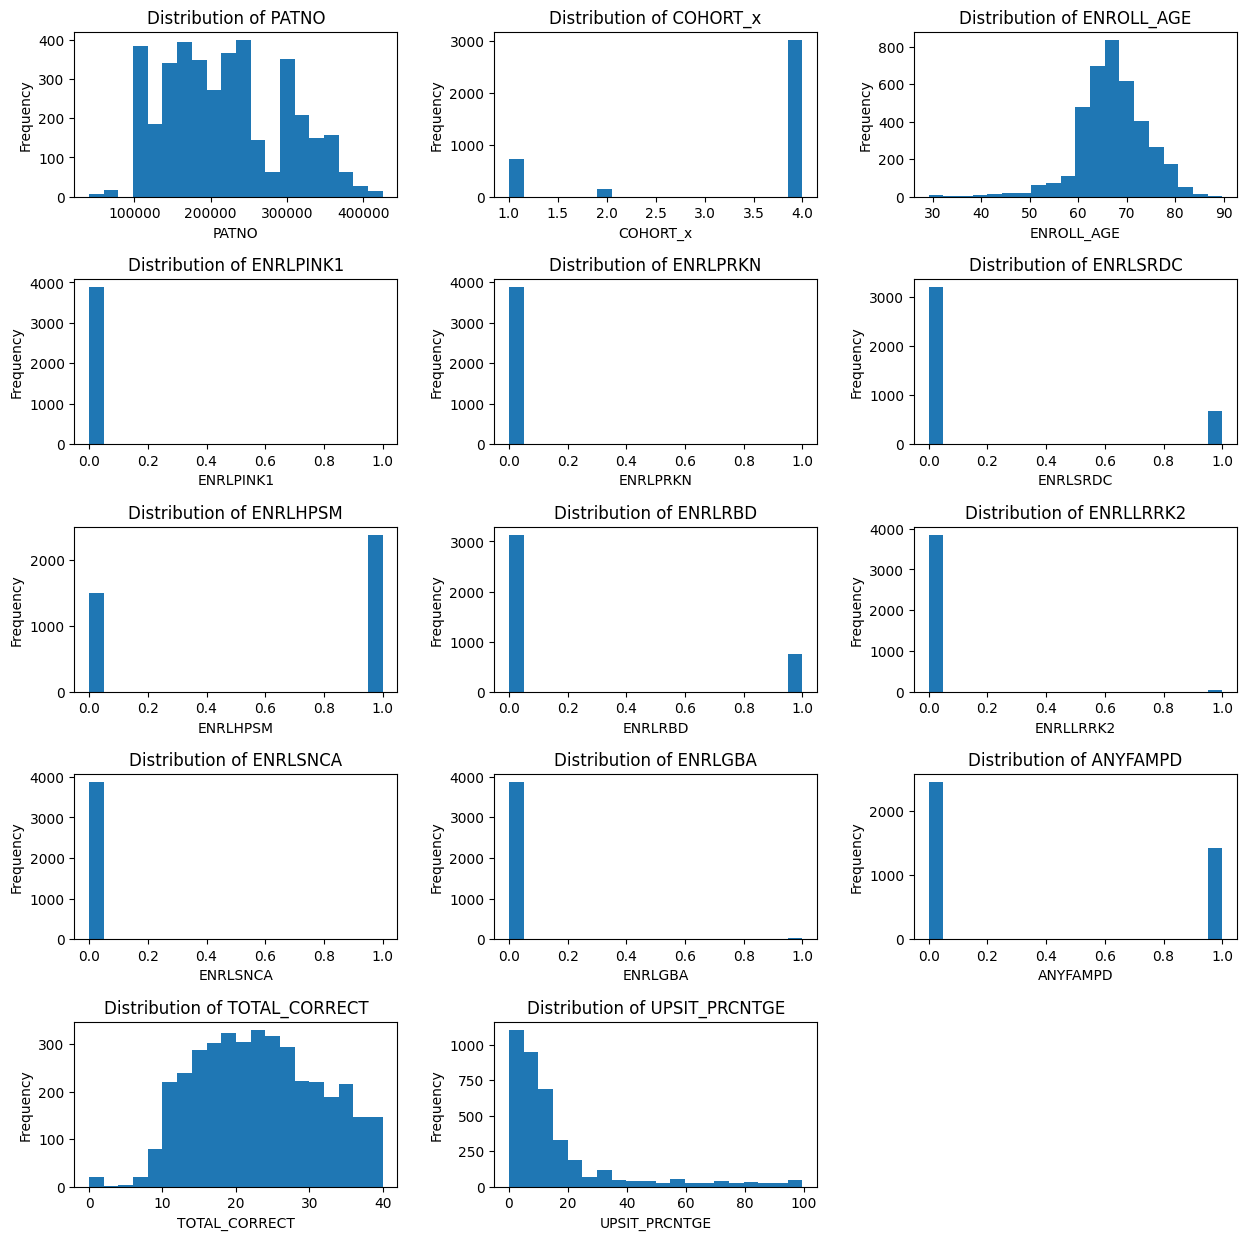

In [90]:
num_features = ['PATNO', 'COHORT_x', 'ENROLL_AGE', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC',
       'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD',
       'TOTAL_CORRECT', 'UPSIT_PRCNTGE']
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.ravel()

for i, col in enumerate(num_features):
    axes[i].hist(filtered_final[col], bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in __builtins__.range(len(num_features), len(axes)):
    print(" ")
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# Categorical Features

In [91]:
cat_vars

Index(['COHORT_DEFINITION', 'ENROLL_STATUS'], dtype='object')

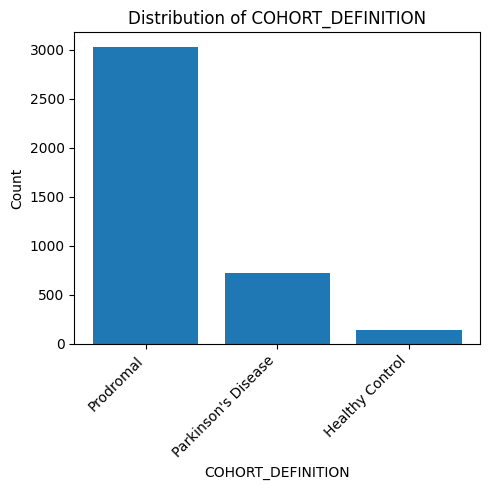

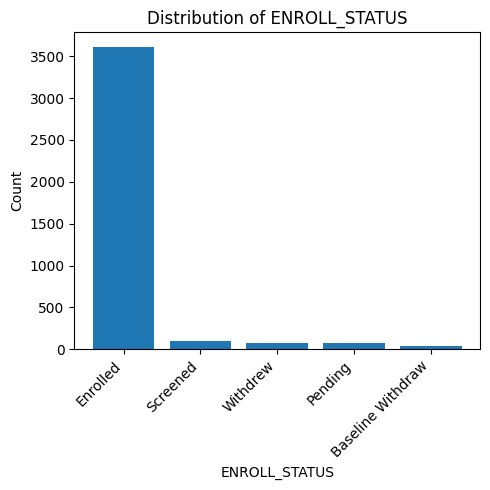

In [92]:
cat_features = ['COHORT_DEFINITION', 'ENROLL_STATUS']
for col in cat_features:
    counts = filtered_final[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    plt.figure(figsize=(5, 5))
    plt.bar(counts[col], counts['count'])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

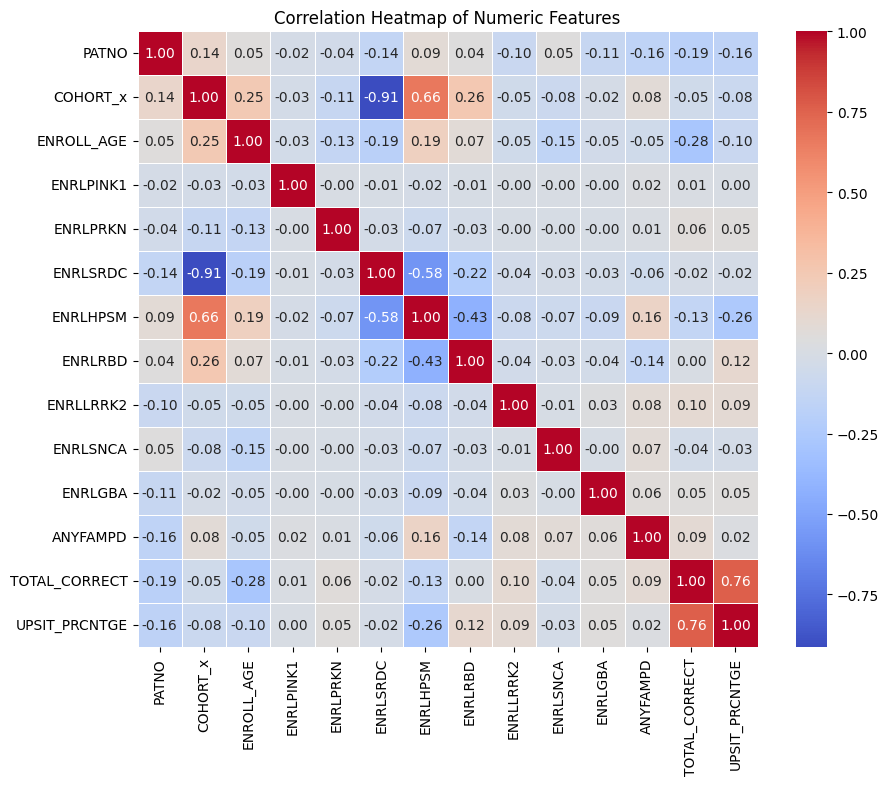

In [93]:
numeric_features = ['PATNO', 'COHORT_x', 'ENROLL_AGE', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC',
       'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD',
       'TOTAL_CORRECT', 'UPSIT_PRCNTGE']

correlation_matrix = filtered_final[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# **Data Pre-processing**

In [94]:
numeric_features = ['ENROLL_AGE', 'TOTAL_CORRECT', 'UPSIT_PRCNTGE']
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(filtered_final[numeric_features])
scaled_data = pd.DataFrame(scaled_values, columns=numeric_features, index=filtered_final.index)
filtered_final.update(scaled_data)
filtered_final.head(10)

,PATNO,COHORT_x,COHORT_DEFINITION,ENROLL_STATUS,ENROLL_AGE,ENRLPINK1,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLLRRK2,ENRLSNCA,ENRLGBA,ANYFAMPD,TOTAL_CORRECT,UPSIT_PRCNTGE
0,40568,4,Prodromal,Enrolled,0.340496,0.0,0.0,0.0,0,0,1,0,0,1.0,0.825,0.211055
1,40568,4,Prodromal,Enrolled,0.340496,0.0,0.0,0.0,0,0,1,0,0,1.0,0.825,0.211055
2,52927,4,Prodromal,Enrolled,0.628099,0.0,0.0,0.0,0,0,0,0,1,1.0,1.000,1.000000
3,52927,4,Prodromal,Enrolled,0.628099,0.0,0.0,0.0,0,0,0,0,1,1.0,0.850,0.542714
4,52927,4,Prodromal,Enrolled,0.628099,0.0,0.0,0.0,0,0,0,0,1,1.0,1.000,1.000000
5,52927,4,Prodromal,Enrolled,0.628099,0.0,0.0,0.0,0,0,0,0,1,1.0,0.850,0.542714
6,54446,4,Prodromal,Enrolled,0.373554,0.0,0.0,0.0,0,0,0,0,1,1.0,0.825,0.180905
7,54446,4,Prodromal,Enrolled,0.373554,0.0,0.0,0.0,0,0,0,0,1,1.0,0.825,0.180905
8,73940,4,Prodromal,Enrolled,0.505785,0.0,0.0,0.0,0,0,1,0,0,1.0,0.875,0.311558
9,73940,4,Prodromal,Enrolled,0.505785,0.0,0.0,0.0,0,0,1,0,0,1.0,0.875,0.311558


In [95]:
filtered_final.tail(10)

,PATNO,COHORT_x,COHORT_DEFINITION,ENROLL_STATUS,ENROLL_AGE,ENRLPINK1,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLLRRK2,ENRLSNCA,ENRLGBA,ANYFAMPD,TOTAL_CORRECT,UPSIT_PRCNTGE
4048,409073,4,Prodromal,Enrolled,0.591736,0.0,0.0,0.0,0,1,0,0,0,0.0,0.125,0.010050
4049,411631,4,Prodromal,Enrolled,0.671074,0.0,0.0,0.0,0,1,0,0,0,0.0,0.300,0.030151
4050,412845,4,Prodromal,Enrolled,0.631405,0.0,0.0,0.0,1,0,0,0,0,1.0,0.250,0.010050
4051,413656,4,Prodromal,Enrolled,0.758678,0.0,0.0,0.0,0,1,0,0,0,0.0,0.525,0.105528
4052,413657,4,Prodromal,Enrolled,0.679339,0.0,0.0,0.0,0,1,0,0,0,0.0,0.700,0.291457
4053,414265,4,Prodromal,Enrolled,0.000000,0.0,0.0,0.0,0,0,0,1,0,1.0,0.850,0.381910
4054,417885,4,Prodromal,Enrolled,0.626446,0.0,0.0,0.0,0,1,0,0,0,0.0,0.525,0.100503
4055,418293,4,Prodromal,Enrolled,0.613223,0.0,0.0,0.0,0,1,0,0,0,0.0,0.325,0.040201
4056,418765,2,Healthy Control,Enrolled,0.471074,0.0,0.0,0.0,0,0,0,0,0,0.0,0.575,0.090452
4057,425673,2,Healthy Control,Enrolled,0.456198,0.0,0.0,0.0,0,0,0,0,0,1.0,0.900,0.628141


# **Modelling/ Classification**

In [96]:
num_vars

Index(['PATNO', 'COHORT_x', 'ENROLL_AGE', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC',
       'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD',
       'TOTAL_CORRECT', 'UPSIT_PRCNTGE'],
      dtype='object')

In [97]:
# prediction of parkinson diease

X = filtered_final[['ENROLL_AGE', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC',
       'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA', 'ANYFAMPD',
       'TOTAL_CORRECT', 'UPSIT_PRCNTGE']]
y = filtered_final['COHORT_x']

# Split data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((2720, 12), (1166, 12), (2720,), (1166,))

In [98]:
# Task 1: Predicting Parkinson
# Train the classifier
classifier1 = RandomForestClassifier(random_state=42)
classifier1.fit(X_train1, y_train1)

# Make predictions
y_pred1 = classifier1.predict(X_test1)

# Evaluate the model
print("Classification Report for Predicting Obesity Status:")
print(classification_report(y_test1, y_pred1))

Classification Report for Predicting Obesity Status:
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       223
           2       0.94      1.00      0.97        48
           4       1.00      1.00      1.00       895

    accuracy                           0.99      1166
   macro avg       0.98      0.99      0.98      1166
weighted avg       0.99      0.99      0.99      1166



# **OVERSAMPLING**

In [99]:
# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Initialize the models
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42)

# Train and evaluate on oversampled data
svm_model.fit(X_resampled_smote, y_resampled_smote)
y_pred_svm_over = svm_model.predict(X_test)
print("SVM (Oversampled):\n", classification_report(y_test, y_pred_svm_over))


SVM (Oversampled):
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       935
           2       1.00      1.00      1.00       882
           4       1.00      0.99      1.00       907

    accuracy                           1.00      2724
   macro avg       1.00      1.00      1.00      2724
weighted avg       1.00      1.00      1.00      2724



# **UNDERSAMPLING**

In [100]:
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X, y)
# Initialize the models
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42)

# Train and evaluate on oversampled data
svm_model.fit(X_resampled_smote, y_resampled_smote)
y_pred_svm_over = svm_model.predict(X_test)
print("SVM (Oversampled):\n", classification_report(y_test, y_pred_svm_over))


SVM (Oversampled):
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       935
           2       1.00      1.00      1.00       882
           4       1.00      0.99      1.00       907

    accuracy                           1.00      2724
   macro avg       1.00      1.00      1.00      2724
weighted avg       1.00      1.00      1.00      2724

